In [85]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face/celebrity'
file_list = os.listdir(dir_path)

print('file_list: {}'.format(file_list))

file_list: ['주진모(올드).jpg', '최현석.jpg', '사쿠라.jpg', '이범수.jpeg', 'RM.jpg', '박신양.png', '로다주.jpeg', '톰 홀랜드.jpg', '배성재.jpg', '제이크 질렌할.jpeg', '브래들리 쿠퍼.jpg', 'b1a4진영.jpeg', '돈스파이크.jpg', '영알남.png', '로제.jpg', '이명박.jpg', '켄 정.jpeg', '잇지유나.jpg', '박희순.jpg', '최민식.jpg', '디오.jpeg', '노홍철.jpeg', '기성용.jpg', '강동원.jpg', '정준하.jpg', '유희열.jpeg', '진.jpg', '리암 니슨.png', '잭 갤리퍼내키스.jpg', '트와이스다현.jpeg', '잇지예지.jpeg', '티파니.jpg', '강민경.jpg', '박진영.jpeg', '공유.jpg', '정민철.jpg', '손흥민.jpg', '봉준호.jpg', '아이린.jpeg', '이성민.jpg', '다니엘 크레이그.jpeg', '류진.jpg', '야마다 타카유키.jpeg', '이연걸.jpeg', '김민재.jpeg', '드웨인 존슨.jpg', '이동휘.jpg', '이효리.jpg', '최준석.jpg', '딕헌터.jpeg', 'trump.jpg', '조승우.jpeg', '장성호.jpeg', '레드벨벳웬디.jpg', '이경규.jpeg', '한효주.jpg', '정형돈.jpg', '류현진.jpg', '

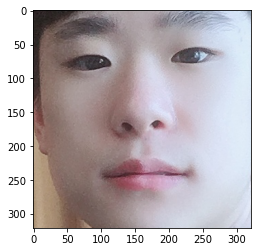

In [86]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face/celebrity/김우렬.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [87]:
image_file = os.path.join(dir_path, '김우렬.jpeg')
face = get_cropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.05733904,  0.12669988,  0.01291843, -0.04723755, -0.08463809,
        -0.01959581, -0.069159  , -0.0425322 ,  0.1487308 , -0.06982377,
         0.2488267 ,  0.01120266, -0.22973444, -0.10186711, -0.08198801,
         0.19377874, -0.16911007, -0.12403807,  0.02373284,  0.049213  ,
         0.1763785 ,  0.00451939, -0.0320114 ,  0.02452875, -0.04809882,
        -0.2847521 , -0.11737668, -0.01775785,  0.05178387, -0.07740214,
        -0.01153131,  0.04480293, -0.20149505, -0.0782291 ,  0.06318304,
         0.086475  , -0.043892  , -0.08366489,  0.16389576,  0.01856714,
        -0.18635716,  0.0582296 ,  0.0517551 ,  0.25625205,  0.1346719 ,
         0.04890099,  0.04940127, -0.18759152,  0.08187214, -0.14561045,
         0.06628879,  0.19752806,  0.14280292,  0.08319809,  0.00549787,
        -0.14224885,  0.06724554,  0.10950849, -0.18599501,  0.04679637,
         0.10980323, -0.01524252, -0.02717666, -0.11678927,  0.18812802,
         0.04365413, -0.13631323, -0.25596821,  0.1

In [88]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            continue
    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['황정민']

array([-2.33736098e-01,  1.39845863e-01,  1.15882427e-01, -7.39727840e-02,
       -9.33956280e-02, -3.64878736e-02, -6.95735961e-02, -5.80077171e-02,
        9.50527787e-02, -1.00845054e-01,  2.48379707e-01, -6.64978698e-02,
       -1.79829687e-01, -6.30507544e-02, -5.48244342e-02,  2.14662656e-01,
       -1.58911780e-01, -1.18800402e-01, -9.17309746e-02, -2.36653853e-02,
        1.33653596e-01,  1.55705144e-03, -8.19987804e-02,  7.49871461e-03,
       -7.40111396e-02, -3.17019612e-01, -4.81821559e-02, -5.52408323e-02,
       -4.16157674e-03, -7.40018338e-02,  2.89333165e-02, -2.81170849e-02,
       -1.69856146e-01, -5.70887327e-02, -1.28606576e-02,  1.34478167e-01,
       -2.92280335e-02, -4.66609672e-02,  1.74646676e-01, -3.99200097e-02,
       -2.16989413e-01,  8.34442005e-02,  9.10887197e-02,  2.92678267e-01,
        1.69128880e-01,  5.80127537e-02,  6.37150332e-02, -1.14382334e-01,
        1.69626355e-01, -1.85955554e-01,  3.45776230e-02,  1.40537113e-01,
        1.54634863e-01,  

In [92]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('김우렬', '황정민')

0.5443884592942402

In [93]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 : 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [94]:
get_nearest_face('김우렬')

순위 1 : 이름(김우렬1), 거리(0.40671009714340967)
순위 2 : 이름(박정민), 거리(0.40979829092016967)
순위 3 : 이름(류준열), 거리(0.4250590404387306)
순위 4 : 이름(씨잼), 거리(0.43957040978334844)
순위 5 : 이름(이종석), 거리(0.44288638581169515)
